In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, confusion_matrix, f1_score, accuracy_score, recall_score, classification_report, roc_auc_score, auc, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

import xgboost as xgb

In [19]:
label_dic = {0: 'Still', 1: 'Walking', 2: 'Run', 3: 'Bike', 4: 'Car', 5: 'Bus', 6: 'Train', 7: 'Subway'}

def evaluate(y_true, y_pred, class_names=list(label_dic.values())):
    #各种评价指标
    print('Macro F1 Score: {}\n'.format(
        f1_score(y_true, y_pred, average='macro')))
    print(classification_report(y_true, y_pred, target_names=class_names))

    #绘制混淆矩阵热力图
    conf = confusion_matrix(y_true, y_pred)
    print(conf)
    plt.figure(figsize=(9, 8))
    sns.heatmap(conf,
                cmap=plt.cm.Blues,
                annot=True,
                fmt="d",
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Predict label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

In [2]:
def rename_columns(dataframe,common_part):
    """去掉给定数据框中给定的列的公共部分

    Args:
        dataframe (str): 数据集
        common_part (str): 公共部分
    """
    dataframe.columns=[col.replace(common_part, '') for col in dataframe.columns]

In [3]:
def matching_columns(dataframe,common_part):
    """匹配给定数据框中具有给定公共部分的所有的列

    Args:
        dataframe (str): 数据集
        common_part (str): 公共部分
    """
    matching_columns = [col for col in dataframe.columns if common_part in col]
    print('找到的列的数量为： {}'.format(len(matching_columns)))
    return matching_columns

# 读取数据

In [6]:
data1_1 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/bag_acc.pkl')
data1_2 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/bag_gps_and_loc.pkl')
data1_3 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/bag_gyr.pkl')
data1_4 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/bag_mag.pkl')
data1_5 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/bag_speed.pkl')
data1_6 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/bag_distance.pkl')
label1 = pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/train/label.pkl')

X1=pd.concat([data1_1, data1_2,data1_3,data1_4,data1_5,data1_6],axis=1)
rename_columns(X1,'bag_')
y1=label1['label']

In [8]:
data1_1 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hand_acc.pkl')
data1_2 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hand_gps_and_loc.pkl')
data1_3 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hand_gyr.pkl')
data1_4 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hand_mag.pkl')
data1_5 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hand_speed.pkl')
data1_6 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hand_distance.pkl')
label1 = pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/train/label.pkl')

X2=pd.concat([data1_1, data1_2,data1_3,data1_4,data1_5,data1_6],axis=1)
rename_columns(X2,'hand_')
y2=label1['label']
X2.head(5)

,acc_Acc_x,acc_Acc_y,acc_Acc_z,acc_L2,Mean_acc_Acc_x,Mean_acc_Acc_y,Mean_acc_Acc_z,Mean_acc_L2,Var_acc_Acc_x,Var_acc_Acc_y,...,vertical_speed_psd_value3,vertical_speed_psd_index1,vertical_speed_psd_index2,vertical_speed_psd_index3,railway_distances,living_street_distances,busway_distances,motorway_distances,residential_distances,pedestrian_distances
0,3.859912,1.117648,8.659125,9.546125,0.230743,-1.524995,-6.658819,10.966902,9.828123,12.248150,...,0.004237,0.0,4.0,8.0,80103.467,80832.968,112332.606,93565.551,78973.559,80846.224
1,4.233104,0.976834,8.528031,9.570825,0.331507,-1.665464,-6.620865,10.894120,9.815271,12.451551,...,0.004237,0.0,4.0,8.0,80105.525,80835.058,112334.684,93567.450,78975.636,80848.297
2,4.654122,1.249928,8.504205,9.774696,0.312765,-1.619069,-6.479663,10.620152,9.509890,12.118767,...,0.004237,0.0,4.0,8.0,80107.647,80837.198,112336.820,93569.442,78977.770,80850.428
3,2.439756,-1.369483,8.789167,9.223738,0.237518,-1.823200,-6.507273,10.642702,9.399555,13.115153,...,0.004237,0.0,4.0,8.0,80109.770,80839.339,112338.955,93571.433,78979.905,80852.560
4,-3.567203,-6.689622,-2.251960,7.908685,0.225795,-1.738052,-6.802606,10.817448,9.119392,12.964230,...,0.004237,0.0,4.0,8.0,80113.756,80843.319,112342.944,93575.265,78983.894,80856.550


In [10]:
data1_1 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hips_acc.pkl')
data1_2 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hips_gps_and_loc.pkl')
data1_3 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hips_gyr.pkl')
data1_4 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hips_mag.pkl')
data1_5 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hips_speed.pkl')
data1_6 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hips_distance.pkl')
label1 = pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/train/label.pkl')

X3=pd.concat([data1_1, data1_2,data1_3,data1_4,data1_5,data1_6],axis=1)
rename_columns(X3,'hips_')
y3=label1['label']
X3.head(5)

,acc_Acc_x,acc_Acc_y,acc_Acc_z,acc_L2,Mean_acc_Acc_x,Mean_acc_Acc_y,Mean_acc_Acc_z,Mean_acc_L2,Var_acc_Acc_x,Var_acc_Acc_y,...,vertical_speed_psd_value3,vertical_speed_psd_index1,vertical_speed_psd_index2,vertical_speed_psd_index3,railway_distances,living_street_distances,busway_distances,motorway_distances,residential_distances,pedestrian_distances
0,-0.355438,-9.969456,-0.093576,9.976229,-0.392430,-10.978878,-0.995148,12.498435,7.882931,11.052984,...,0.000943,16.0,12.0,4.0,80097.637,80830.154,112328.404,93553.174,78969.215,80841.495
1,-0.275554,-9.988609,0.104258,9.992953,-0.384695,-10.731334,-1.130331,12.293690,7.622021,12.584175,...,0.000943,16.0,12.0,4.0,80096.824,80829.342,112327.590,93552.396,78968.401,80840.681
2,-0.137359,-9.925950,0.236137,9.929709,-0.382635,-10.718371,-1.413570,12.362852,7.376285,12.183611,...,0.000943,16.0,12.0,4.0,80096.068,80828.587,112326.834,93551.669,78967.645,80839.924
3,0.034332,-10.087738,0.488022,10.099594,-0.429510,-10.623510,-1.374935,12.225513,7.218286,12.099828,...,0.000943,16.0,12.0,4.0,80095.403,80827.923,112326.168,93551.029,78966.979,80839.259
4,1.417306,-9.909104,-0.199062,10.011929,-0.521914,-10.571062,-1.453014,12.170379,7.289857,11.826692,...,0.000943,16.0,12.0,4.0,80094.737,80827.259,112325.502,93550.389,78966.313,80838.593


In [11]:
data1_1 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/torso_acc.pkl')
data1_2 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/torso_gps_and_loc.pkl')
data1_3 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/torso_gyr.pkl')
data1_4 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/torso_mag.pkl')
data1_5 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/torso_speed.pkl')
data1_6 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/torso_distance.pkl')
label1 = pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/train/label.pkl')

X4=pd.concat([data1_1, data1_2,data1_3,data1_4,data1_5,data1_6],axis=1)
rename_columns(X4,'torso_')
y4=label1['label']
X4.head(5)

,acc_Acc_x,acc_Acc_y,acc_Acc_z,acc_L2,Mean_acc_Acc_x,Mean_acc_Acc_y,Mean_acc_Acc_z,Mean_acc_L2,Var_acc_Acc_x,Var_acc_Acc_y,...,vertical_speed_psd_value3,vertical_speed_psd_index1,vertical_speed_psd_index2,vertical_speed_psd_index3,railway_distances,living_street_distances,busway_distances,motorway_distances,residential_distances,pedestrian_distances
0,0.718613,-9.892841,0.881066,9.957961,1.538945,-8.774836,-2.885599,10.229248,4.376540,9.898680,...,0.000943,16.0,12.0,4.0,80097.637,80830.154,112328.404,93553.174,78969.215,80841.495
1,0.631726,-9.892154,0.845507,9.948300,1.537268,-8.658267,-2.939489,10.126476,4.230742,9.989961,...,0.000943,16.0,12.0,4.0,80096.824,80829.342,112327.590,93552.396,78968.401,80840.681
2,0.346629,-9.832772,0.709802,9.864450,1.451794,-8.535109,-3.176654,10.172500,4.328054,10.153074,...,0.000943,16.0,12.0,4.0,80096.068,80828.587,112326.834,93551.669,78967.645,80839.924
3,-0.959425,-9.615812,-1.397516,9.764087,1.439437,-8.458827,-3.353097,10.193823,4.197841,10.027815,...,0.000943,16.0,12.0,4.0,80095.403,80827.923,112326.168,93551.029,78966.979,80839.259
4,0.583314,-7.749900,-3.771695,8.638686,1.396456,-8.413592,-3.332570,10.112025,4.133444,9.793514,...,0.000943,16.0,12.0,4.0,80094.737,80827.259,112325.502,93550.389,78966.313,80838.593


In [12]:
data2_1 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_acc.pkl')
data2_2 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_gps_and_loc.pkl')
data2_3 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_gyr.pkl')
data2_4 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_mag.pkl')
data2_5 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_speed.pkl')
data2_6 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_distance.pkl')
label2 = pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/validate/label.pkl')

X_val=pd.concat([data2_1, data2_2,data2_3,data2_4,data2_5,data2_6],axis=1)
rename_columns(X_val,'hand_')
y_val=label2['label']
X_val.head(5)

,acc_Acc_x,acc_Acc_y,acc_Acc_z,acc_L2,Mean_acc_Acc_x,Mean_acc_Acc_y,Mean_acc_Acc_z,Mean_acc_L2,Var_acc_Acc_x,Var_acc_Acc_y,...,vertical_speed_psd_value3,vertical_speed_psd_index1,vertical_speed_psd_index2,vertical_speed_psd_index3,railway_distances,living_street_distances,busway_distances,motorway_distances,residential_distances,pedestrian_distances
0,-2.077102,-0.681738,7.905215,8.201923,7.258607,1.113912,2.269153,13.128045,138.508510,34.660442,...,0.000032,4.0,0.0,8.0,83531.867,84428.866,115852.333,96470.909,82473.708,84340.482
1,-1.235258,0.948044,11.653373,11.756945,6.983426,0.906878,2.302758,12.910391,136.239028,34.833860,...,0.000032,4.0,0.0,8.0,83530.403,84427.479,115850.905,96469.326,82472.268,84339.044
2,-0.604894,-0.209900,9.573598,9.594985,7.091807,0.933103,2.265562,12.839901,132.220107,33.732195,...,0.000032,4.0,0.0,8.0,83528.827,84425.940,115849.345,96467.728,82470.703,84337.480
3,-1.700441,-2.692610,9.062538,9.605792,6.877252,1.197963,2.233612,12.746238,129.607341,34.993057,...,0.000032,4.0,0.0,8.0,83527.124,84424.264,115847.653,96466.034,82469.008,84335.785
4,-1.776053,0.377002,9.437498,9.610560,6.693053,0.943349,2.313041,12.635006,126.833442,36.136828,...,0.000032,4.0,0.0,8.0,83524.974,84422.240,115845.562,96463.681,82466.899,84333.679


In [13]:
X=pd.concat([X1,X2,X3,X4],axis=0)
y=pd.concat([y1,y2,y3,y4],axis=0)

In [14]:
le = LabelEncoder()
y = le.fit_transform(y)
y_val = le.fit_transform(y_val)
#查看标签转化结果
le.inverse_transform([0,1,2,3,4,5,6,7])

array([1, 2, 3, 4, 5, 6, 7, 8])

In [15]:
#打乱数据集顺序
X,y= shuffle(X,y,random_state=648)

# 建立模型

In [16]:
model_XGB_final = xgb.XGBClassifier(learning_rate=0.01,
                                    n_estimators=200,
                                    gpu_id=0,
                                    max_depth=6,
                                    min_child_weight=1,
                                    gamma=0,
                                    tree_method='gpu_hist')

In [17]:
model_XGB_final.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Macro F1 Score: 0.8457473832737454

              precision    recall  f1-score   support

       Still       0.90      0.95      0.93     29841
     Walking       0.90      0.93      0.92     26148
         Run       1.00      0.63      0.77      2775
        Bike       0.91      0.92      0.91     12029
         Car       0.79      0.80      0.80     20474
         Bus       0.75      0.66      0.70      9177
       Train       0.87      0.76      0.81     21810
      Subway       0.88      0.98      0.93     21706

    accuracy                           0.87    143960
   macro avg       0.88      0.83      0.85    143960
weighted avg       0.87      0.87      0.87    143960

[[28361   574     0     6    13   368   215   304]
 [ 1389 24278     0   298    10    47    15   111]
 [    0   940  1741    94     0     0     0     0]
 [  249   586     0 11023     7   164     0     0]
 [  528   326     0   320 16378  1099  1823     0]
 [  218     0     0   275  2529  6082    73     0]
 [  650

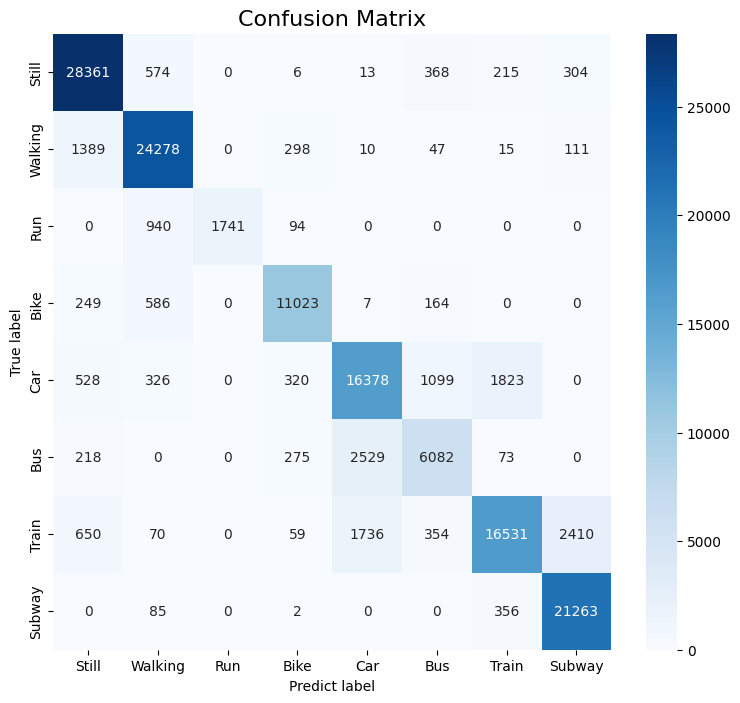

In [20]:
evaluate(y_val, model_XGB_final.predict(X_val).tolist())

# 调参

In [23]:
scorel = []
for num in range(100, 301, 50):
    model_test = xgb.XGBClassifier(learning_rate=0.01,
                                    n_estimators=num,
                                    gpu_id=0,
                                    max_depth=6,
                                    min_child_weight=1,
                                    gamma=0,
                                    tree_method='gpu_hist').fit(X, y)
    score = f1_score(y_val, model_test.predict(X_val).tolist(), average='macro')
    scorel.append(score)
    print('参数为 {} 的模型已检验完成！'.format(num))

参数为 100 的模型已检验完成！
参数为 150 的模型已检验完成！
参数为 200 的模型已检验完成！
参数为 250 的模型已检验完成！
参数为 300 的模型已检验完成！


In [25]:
print("最优模型的F1 Macro Score为 {} ,对应的最优参数为 {} \n".format(max(scorel), (scorel.index(max(scorel))*50)+100))

最优模型的F1 Macro Score为 0.8486019548730689 ,对应的最优参数为 300 



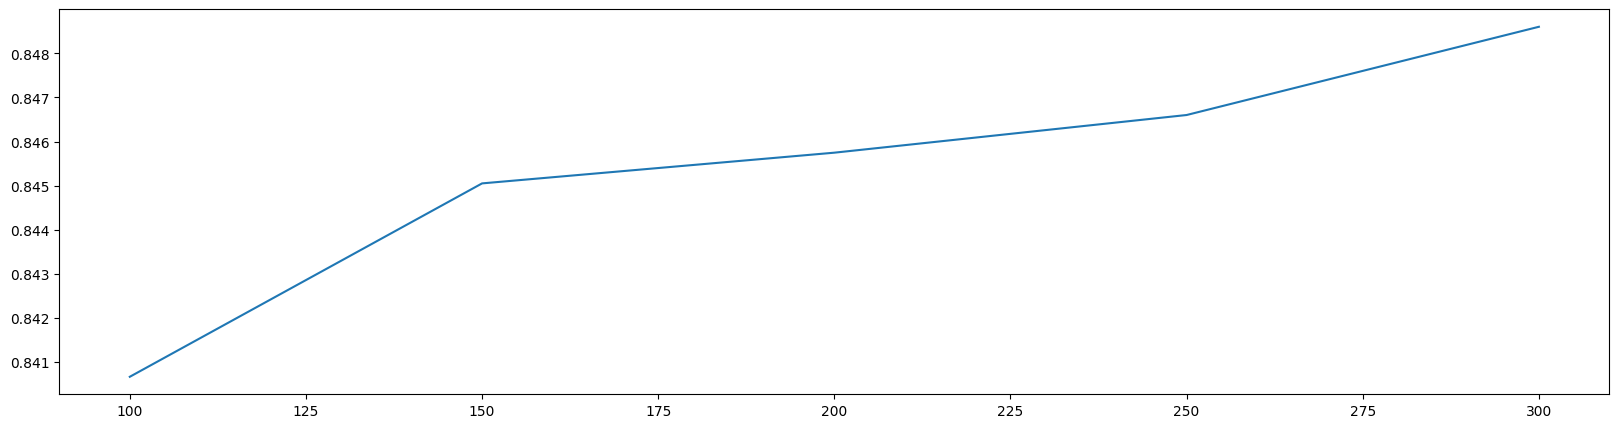

In [26]:
# 作图反映出准确度随着估计器数量的变化
plt.figure(figsize=[20, 5])
plt.plot(range(100, 301, 50), scorel)
plt.show()

没啥区别，所以仍然选择评估器的数量为200

In [27]:
score2 = []
for num in range(5, 10, 1):
    model_test = xgb.XGBClassifier(learning_rate=0.01,
                                    n_estimators=200,
                                    gpu_id=0,
                                    max_depth=num,
                                    min_child_weight=1,
                                    gamma=0,
                                    tree_method='gpu_hist').fit(X, y)
    score = f1_score(y_val, model_test.predict(X_val).tolist(), average='macro')
    score2.append(score)
    print('参数为 {} 的模型已检验完成！'.format(num))

参数为 5 的模型已检验完成！
参数为 6 的模型已检验完成！
参数为 7 的模型已检验完成！
参数为 8 的模型已检验完成！
参数为 9 的模型已检验完成！


最优模型的F1 Macro Score为 0.8535273991938934 ,对应的最优参数为 7 



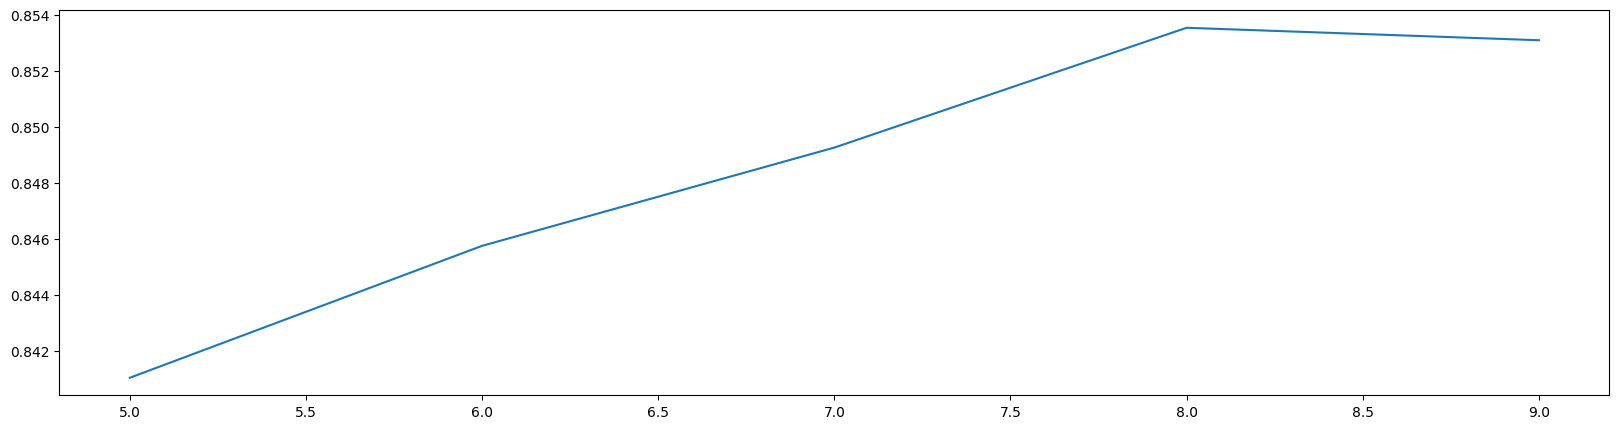

In [30]:
print("最优模型的F1 Macro Score为 {} ,对应的最优参数为 {} \n".format(max(score2), (score2.index(max(score2))*1)+4))
# 作图反映出准确度随着估计器数量的变化
plt.figure(figsize=[20, 5])
plt.plot(range(5, 10, 1), score2)
plt.show()

In [37]:
score3 = []
for num in np.arange(0.8,1.01,0.05):
    model_test = xgb.XGBClassifier(learning_rate=0.01,
                                    n_estimators=200,
                                    gpu_id=0,
                                    max_depth=8,
                                    min_child_weight=1,
                                    gamma=0,
                                    colsample_bytree=num,
                                    tree_method='gpu_hist').fit(X, y)
    score = f1_score(y_val, model_test.predict(X_val).tolist(), average='macro')
    score3.append(score)
    print('参数为 {} 的模型已检验完成！'.format(num))

参数为 0.8 的模型已检验完成！
参数为 0.8500000000000001 的模型已检验完成！
参数为 0.9000000000000001 的模型已检验完成！
参数为 0.9500000000000002 的模型已检验完成！
参数为 1.0000000000000002 的模型已检验完成！


最优模型的F1 Macro Score为 0.8558939323599534 ,对应的最优参数为 0.8500000000000001 



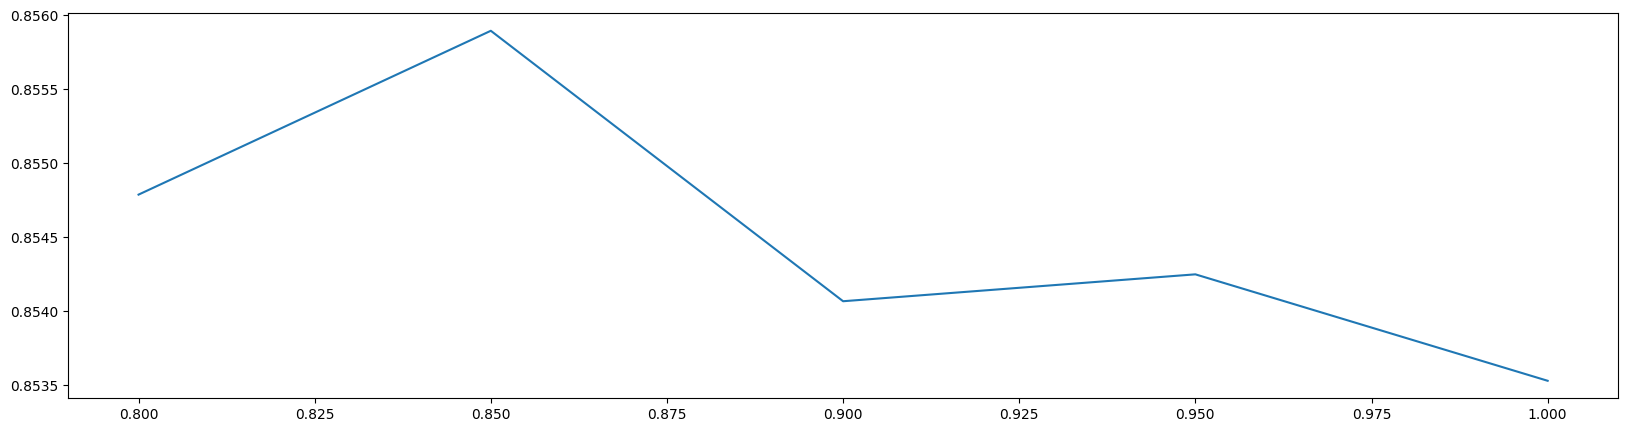

In [40]:
print("最优模型的F1 Macro Score为 {} ,对应的最优参数为 {} \n".format(max(score3), (score3.index(max(score3))*0.05)+0.8))
# 作图反映出准确度随着估计器数量的变化
plt.figure(figsize=[20, 5])
plt.plot(np.arange(0.8,1.01,0.05), score3)
plt.show()

# 最终模型

In [41]:
model_XGB = xgb.XGBClassifier(learning_rate=0.01,
                                n_estimators=200,
                                gpu_id=0,
                                max_depth=8,
                                min_child_weight=1,
                                gamma=0,
                                colsample_bytree=0.85,
                                tree_method='gpu_hist')

In [42]:
model_XGB.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.85, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Macro F1 Score: 0.8558939323599534

              precision    recall  f1-score   support

       Still       0.90      0.96      0.92     29841
     Walking       0.91      0.92      0.92     26148
         Run       1.00      0.64      0.78      2775
        Bike       0.93      0.92      0.92     12029
         Car       0.80      0.81      0.81     20474
         Bus       0.79      0.65      0.71      9177
       Train       0.88      0.80      0.84     21810
      Subway       0.90      0.99      0.94     21706

    accuracy                           0.88    143960
   macro avg       0.89      0.84      0.86    143960
weighted avg       0.88      0.88      0.88    143960

[[28545   442     0    11    14   228   344   257]
 [ 1632 24112     0   226     0    27    22   129]
 [    0   912  1782    81     0     0     0     0]
 [  290   489     0 11089     0   161     0     0]
 [  570   272     0   255 16602   927  1848     0]
 [  225     1     0   249  2658  5944   100     0]
 [  630

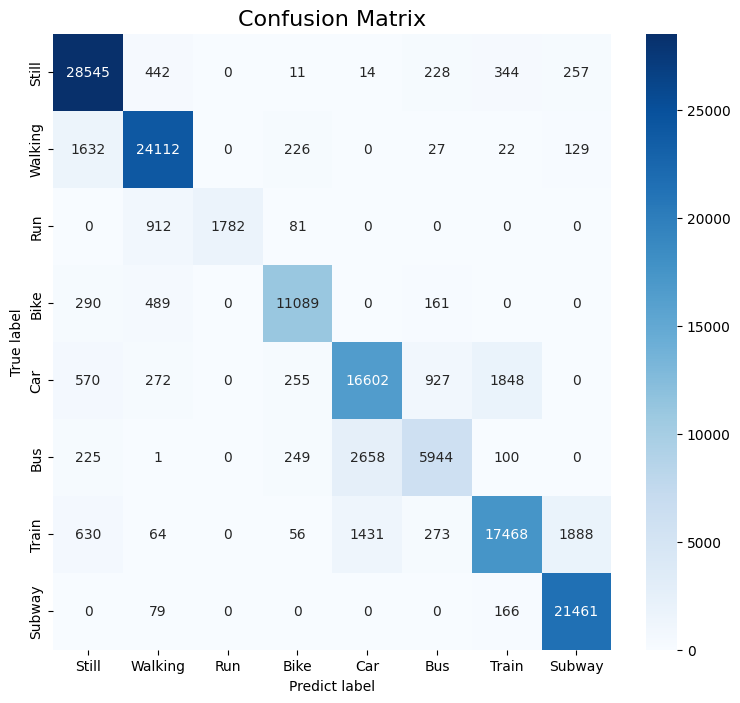

In [43]:
evaluate(y_val, model_XGB.predict(X_val).tolist())

# 后处理

In [50]:
label2['label_pred']=model_XGB.predict(X_val).tolist()
label2['time']=pd.to_datetime(label2['time'], unit="ms")
label2.set_index(keys='time',inplace=True)
label2

,label,label_pred
time,,
2017-06-14 08:04:51.760,3,2
2017-06-14 08:04:52.760,3,2
2017-06-14 08:04:53.760,3,2
2017-06-14 08:04:54.760,3,2
2017-06-14 08:04:55.760,3,2
...,...,...
2017-07-18 15:00:28.760,1,0
2017-07-18 15:00:29.760,1,0
2017-07-18 15:00:30.760,1,0


In [47]:
#label2.reset_index(inplace=True)
#label2['time']=label2.time.values.astype('int') // 10**6

In [51]:
label2['pred_mode_60s'] = label2['label_pred'].rolling('60s', center = True).agg(lambda x: x.mode()[0]).fillna(method = 'ffill').fillna(method = 'bfill').astype('int')
label2['pred_mode_120s'] = label2['label_pred'].rolling('120s', center = True).agg(lambda x: x.mode()[0]).fillna(method = 'ffill').fillna(method = 'bfill').astype('int')
label2['pred_mode_300s'] = label2['label_pred'].rolling('300s', center = True).agg(lambda x: x.mode()[0]).fillna(method = 'ffill').fillna(method = 'bfill').astype('int')

In [52]:
label2['label_diff']=label2['label_pred']-label2['pred_mode_60s']
print('60s众数平滑窗口改变的标签量为：{}'.format(len(label2[label2['label_diff']!=0])))
label2['label_diff']=label2['label_pred']-label2['pred_mode_120s']
print('12s众数平滑窗口改变的标签量为：{}'.format(len(label2[label2['label_diff']!=0])))
label2['label_diff']=label2['label_pred']-label2['pred_mode_300s']
print('300s众数平滑窗口改变的标签量为：{}'.format(len(label2[label2['label_diff']!=0])))

60s众数平滑窗口改变的标签量为：3441
12s众数平滑窗口改变的标签量为：6761
300s众数平滑窗口改变的标签量为：11469


In [53]:
label2.reset_index(inplace=True)
label2

,time,label,label_pred,pred_mode_60s,pred_mode_120s,pred_mode_300s,label_diff
0,2017-06-14 08:04:51.760,3,2,2,2,2,0
1,2017-06-14 08:04:52.760,3,2,2,2,2,0
2,2017-06-14 08:04:53.760,3,2,2,2,2,0
3,2017-06-14 08:04:54.760,3,2,2,2,2,0
4,2017-06-14 08:04:55.760,3,2,2,2,2,0
...,...,...,...,...,...,...,...
143955,2017-07-18 15:00:28.760,1,0,0,0,0,0
143956,2017-07-18 15:00:29.760,1,0,0,0,0,0
143957,2017-07-18 15:00:30.760,1,0,0,0,0,0
143958,2017-07-18 15:00:31.760,1,0,0,0,0,0


In [54]:
label0=pd.read_pickle('/home/ossdata/dengjiebi/data_processed/validate/label.pkl')
label0['time']=pd.to_datetime(label0['time'], unit="ms")
label0

,time,label
0,2017-06-14 08:04:51.760,3
1,2017-06-14 08:04:51.770,3
2,2017-06-14 08:04:51.780,3
3,2017-06-14 08:04:51.790,3
4,2017-06-14 08:04:51.800,3
...,...,...
14395936,2017-07-18 15:00:33.120,1
14395937,2017-07-18 15:00:33.130,1
14395938,2017-07-18 15:00:33.140,1
14395939,2017-07-18 15:00:33.150,1


In [55]:
df_full=pd.merge_asof(label0,label2[['time','label_pred','pred_mode_60s','pred_mode_120s','pred_mode_300s']],on='time', tolerance=pd.Timedelta("1s"),direction='nearest')
df_full['label_pred']+=1
df_full['pred_mode_60s']+=1
df_full['pred_mode_120s']+=1
df_full['pred_mode_300s']+=1
df_full

,time,label,label_pred,pred_mode_60s,pred_mode_120s,pred_mode_300s
0,2017-06-14 08:04:51.760,3,3,3,3,3
1,2017-06-14 08:04:51.770,3,3,3,3,3
2,2017-06-14 08:04:51.780,3,3,3,3,3
3,2017-06-14 08:04:51.790,3,3,3,3,3
4,2017-06-14 08:04:51.800,3,3,3,3,3
...,...,...,...,...,...,...
14395936,2017-07-18 15:00:33.120,1,1,1,1,1
14395937,2017-07-18 15:00:33.130,1,1,1,1,1
14395938,2017-07-18 15:00:33.140,1,1,1,1,1
14395939,2017-07-18 15:00:33.150,1,1,1,1,1


Macro F1 Score: 0.8559096993355954

              precision    recall  f1-score   support

       Still       0.89      0.96      0.92   2983752
     Walking       0.91      0.92      0.92   2614854
         Run       1.00      0.64      0.78    277388
        Bike       0.93      0.92      0.92   1203050
         Car       0.80      0.81      0.81   2047370
         Bus       0.79      0.65      0.71    917808
       Train       0.88      0.80      0.84   2180992
      Subway       0.90      0.99      0.94   2170727

    accuracy                           0.88  14395941
   macro avg       0.89      0.84      0.86  14395941
weighted avg       0.88      0.88      0.88  14395941

[[2854314   44155       0    1086    1410   22790   34411   25586]
 [ 163385 2411216       0   22529       0    2701    2200   12823]
 [      0   91153  178151    8084       0       0       0       0]
 [  29129   48886       0 1108935       0   16100       0       0]
 [  57032   27156       0   25454 1660228   9

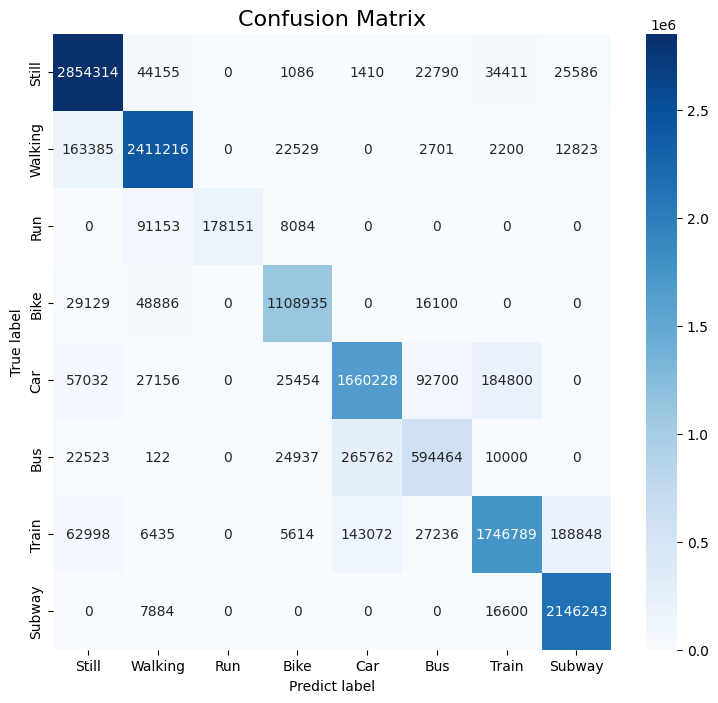

macro F1 score:0.8559096993355954


In [56]:
evaluate(df_full['label'],df_full['label_pred'])
print('macro F1 score:{}'.format(f1_score(df_full['label'],df_full['label_pred'], average='macro')))

Macro F1 Score: 0.868731630355326

              precision    recall  f1-score   support

       Still       0.90      0.96      0.93   2983752
     Walking       0.92      0.94      0.93   2614854
         Run       1.00      0.66      0.80    277388
        Bike       0.95      0.93      0.94   1203050
         Car       0.81      0.84      0.82   2047370
         Bus       0.81      0.67      0.73    917808
       Train       0.90      0.80      0.85   2180992
      Subway       0.91      0.99      0.95   2170727

    accuracy                           0.89  14395941
   macro avg       0.90      0.85      0.87  14395941
weighted avg       0.89      0.89      0.89  14395941

[[2878200   38623       0    1186       0   14757   29300   21686]
 [ 150280 2445494      22   13236       0    1568       0    4254]
 [      0   90555  183464    3369       0       0       0       0]
 [  24654   45786       0 1120810       0   11800       0       0]
 [  56725   28441       0   12200 1712228   90

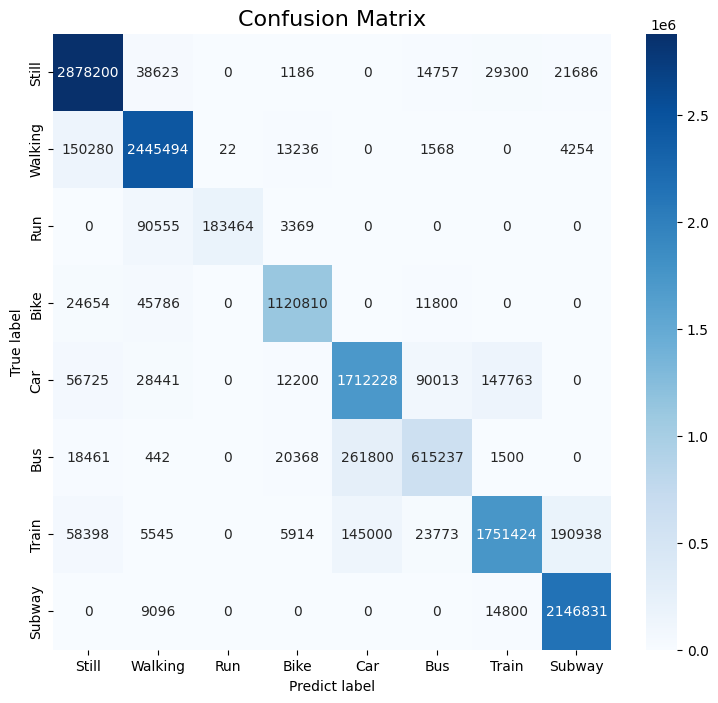

macro F1 score:0.868731630355326


In [57]:
evaluate(df_full['label'],df_full['pred_mode_60s'])
print('macro F1 score:{}'.format(f1_score(df_full['label'],df_full['pred_mode_60s'], average='macro')))

Macro F1 Score: 0.8799028052446901

              precision    recall  f1-score   support

       Still       0.91      0.97      0.94   2983752
     Walking       0.92      0.95      0.94   2614854
         Run       1.00      0.64      0.78    277388
        Bike       0.97      0.95      0.96   1203050
         Car       0.82      0.87      0.84   2047370
         Bus       0.86      0.69      0.76    917808
       Train       0.92      0.81      0.86   2180992
      Subway       0.91      0.99      0.95   2170727

    accuracy                           0.90  14395941
   macro avg       0.91      0.86      0.88  14395941
weighted avg       0.91      0.90      0.90  14395941

[[2899487   37823       0       0       0   10789   22700   12953]
 [ 117228 2480695      22    7987       0    3468       0    5454]
 [      0   97255  178764    1369       0       0       0       0]
 [  22854   40686       0 1139510       0       0       0       0]
 [  63132   13510       0   13446 1781206   6

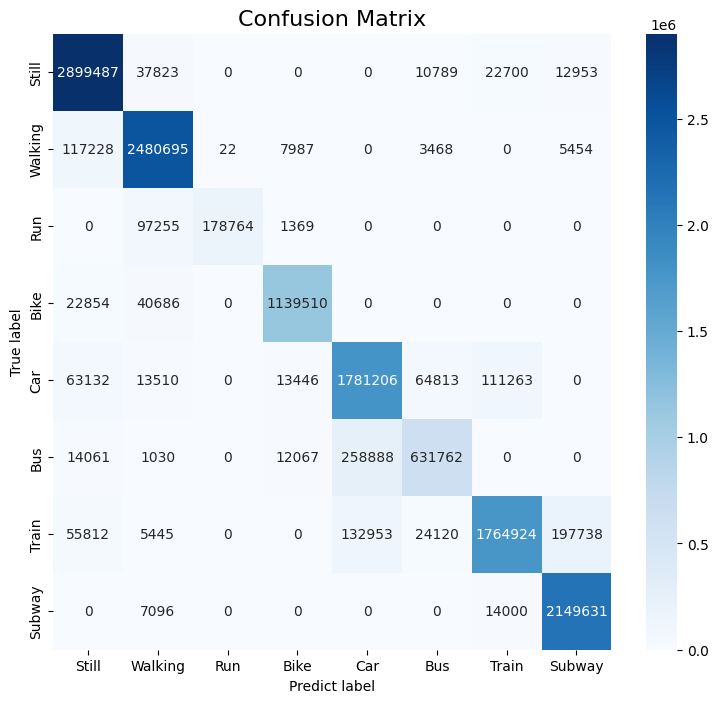

macro F1 score:0.8799028052446901


In [58]:
evaluate(df_full['label'],df_full['pred_mode_120s'])
print('macro F1 score:{}'.format(f1_score(df_full['label'],df_full['pred_mode_120s'], average='macro')))

Macro F1 Score: 0.9085673848535856

              precision    recall  f1-score   support

       Still       0.94      0.98      0.95   2983752
     Walking       0.93      0.95      0.94   2614854
         Run       1.00      0.62      0.76    277388
        Bike       0.99      0.99      0.99   1203050
         Car       0.87      0.94      0.90   2047370
         Bus       0.93      0.75      0.83    917808
       Train       0.98      0.87      0.92   2180992
      Subway       0.93      1.00      0.96   2170727

    accuracy                           0.93  14395941
   macro avg       0.95      0.89      0.91  14395941
weighted avg       0.94      0.93      0.93  14395941

[[2909463   46823       0       0       0       0   16900   10566]
 [  92223 2496655      22     373       0   12222       0   13359]
 [      0  106324  171064       0       0       0       0       0]
 [   8054    7168       0 1187828       0       0       0       0]
 [  41063   13911       0    6446 1930850   3

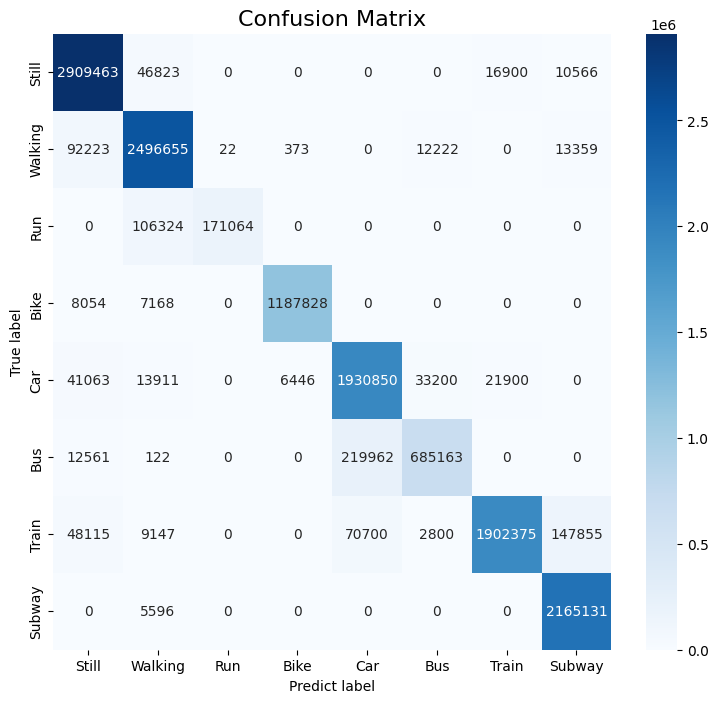

macro F1 score:0.9085673848535856


In [59]:
evaluate(df_full['label'],df_full['pred_mode_300s'])
print('macro F1 score:{}'.format(f1_score(df_full['label'],df_full['pred_mode_300s'], average='macro')))

In [60]:
#模型保存
import pickle
# save model to file 模型保存
pickle.dump(model_XGB, open("/home/ossdata/dengjiebi/model_final.pkl", "wb"))
 
# load model from file 模型加载
#loaded_model = pickle.load(open("/home/ossdata/dengjiebi/model1.pkl", "rb"))

# 测试集

In [61]:
data3_1 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/test/test_acc.pkl')
data3_2 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/test/test_gps_and_loc.pkl')
data3_3 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/test/test_gyr.pkl')
data3_4 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/test/test_mag.pkl')
data3_5 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/test/test_speed.pkl')
data3_6 = pd.read_pickle('/home/ossdata/dengjiebi/data_full/test/test_distance.pkl')

X_test=pd.concat([data3_1, data3_2,data3_3,data3_4,data3_5,data3_6],axis=1)
rename_columns(X_test,'test_')
X_test.head(5)

,acc_Acc_x,acc_Acc_y,acc_Acc_z,acc_L2,Mean_acc_Acc_x,Mean_acc_Acc_y,Mean_acc_Acc_z,Mean_acc_L2,Var_acc_Acc_x,Var_acc_Acc_y,...,vertical_speed_psd_value3,vertical_speed_psd_index1,vertical_speed_psd_index2,vertical_speed_psd_index3,railway_distances,living_street_distances,busway_distances,motorway_distances,residential_distances,pedestrian_distances
0,1.887083,4.855441,7.165227,8.858717,1.532213,3.960434,8.645449,10.147210,4.735924,2.689712,...,0.000392,16.0,12.0,8.0,76341.404,77645.880,108826.627,88650.667,75416.123,77289.567
1,3.446420,5.291521,12.328029,13.851293,1.435654,3.894931,8.689819,10.152433,4.867089,2.733063,...,0.000392,16.0,12.0,8.0,76341.080,77645.580,108826.312,88650.304,75415.807,77289.252
2,1.600775,5.773366,5.841525,8.367655,1.329650,3.819501,8.692287,10.119722,5.069665,2.826970,...,0.000392,16.0,12.0,8.0,76340.835,77645.355,108826.074,88650.025,75415.568,77289.014
3,2.806497,8.348034,-0.359370,8.814491,1.276330,3.721388,8.712358,10.097383,5.005058,3.056290,...,0.000392,16.0,12.0,8.0,76340.624,77645.165,108825.870,88649.774,75415.364,77288.810
4,2.374362,4.027273,10.380246,11.384464,1.188958,3.696198,8.719857,10.081729,5.112941,2.985250,...,0.000392,16.0,12.0,8.0,76340.383,77644.943,108825.635,88649.497,75415.129,77288.575


In [62]:
y_test_tmp=model_XGB.predict(X_test).tolist()

In [69]:
print(len(y_test_tmp))

463859


In [68]:
time = pd.read_pickle('/home/dengjiebi/SHL2023/data_test/test_label_idx.pkl')
time

,Time
0,2497349368580
1,2497349368590
2,2497349368600
3,2497349368610
4,2497349368620
...,...
46385811,3500971089580
46385812,3500971089590
46385813,3500971089600
46385814,3500971089610


In [71]:
time_tmp=time.loc[np.arange(0,len(time),100),"Time"]
time_tmp

0           2497349368580
100         2497349369580
200         2497349370580
300         2497349371580
400         2497349372580
                ...      
46385400    3500971085470
46385500    3500971086470
46385600    3500971087470
46385700    3500971088470
46385800    3500971089470
Name: Time, Length: 463859, dtype: int64

In [72]:
dic={
    'Time' : time_tmp.values,
    'label' : y_test_tmp
}

df_pred=pd.DataFrame(dic)
df_pred

,Time,label
0,2497349368580,1
1,2497349369580,1
2,2497349370580,1
3,2497349371580,1
4,2497349372580,1
...,...,...
463854,3500971085470,1
463855,3500971086470,1
463856,3500971087470,1
463857,3500971088470,1


In [74]:
df_pred['Time']=pd.to_datetime(df_pred['Time'], unit="ms")
df_pred.set_index(keys='Time',inplace=True)
df_pred

,label
Time,
2049-02-19 12:09:28.580,1
2049-02-19 12:09:29.580,1
2049-02-19 12:09:30.580,1
2049-02-19 12:09:31.580,1
2049-02-19 12:09:32.580,1
...,...
2080-12-09 11:58:05.470,1
2080-12-09 11:58:06.470,1
2080-12-09 11:58:07.470,1


In [75]:
df_pred['Label'] = df_pred['label'].rolling('300s', center = True).agg(lambda x: x.mode()[0]).fillna(method = 'ffill').fillna(method = 'bfill').astype('int')

In [77]:
df_pred['label_diff']=df_pred['label']-df_pred['Label']
print('300s众数平滑窗口改变的标签量为：{}'.format(len(df_pred[df_pred['label_diff']!=0])))

300s众数平滑窗口改变的标签量为：37410


In [78]:
df_pred['Label_true']=df_pred['Label']+1
df_pred

,label,Label,label_diff,Label_true
Time,,,,
2049-02-19 12:09:28.580,1,1,0,2
2049-02-19 12:09:29.580,1,1,0,2
2049-02-19 12:09:30.580,1,1,0,2
2049-02-19 12:09:31.580,1,1,0,2
2049-02-19 12:09:32.580,1,1,0,2
...,...,...,...,...
2080-12-09 11:58:05.470,1,1,0,2
2080-12-09 11:58:06.470,1,1,0,2
2080-12-09 11:58:07.470,1,1,0,2


In [83]:
df_pred.reset_index(inplace=True)
df_pred['Time']=df_pred.Time.values.astype('int') // 10**6
df_pred

,Time,label,Label,label_diff,Label_true
0,2497349368580,1,1,0,2
1,2497349369580,1,1,0,2
2,2497349370580,1,1,0,2
3,2497349371580,1,1,0,2
4,2497349372580,1,1,0,2
...,...,...,...,...,...
463854,3500971085470,1,1,0,2
463855,3500971086470,1,1,0,2
463856,3500971087470,1,1,0,2
463857,3500971088470,1,1,0,2


In [89]:
df_pred['Time']=pd.to_datetime(df_pred['Time'], unit="ms")
time['Time']=pd.to_datetime(time['Time'], unit="ms")

df_full=pd.merge_asof(time,df_pred[['Time','Label_true']],on='Time', tolerance=pd.Timedelta("1s"),direction='nearest')
df_full

,Time,Label_true
0,2049-02-19 12:09:28.580,2
1,2049-02-19 12:09:28.590,2
2,2049-02-19 12:09:28.600,2
3,2049-02-19 12:09:28.610,2
4,2049-02-19 12:09:28.620,2
...,...,...
46385811,2080-12-09 11:58:09.580,2
46385812,2080-12-09 11:58:09.590,2
46385813,2080-12-09 11:58:09.600,2
46385814,2080-12-09 11:58:09.610,2


In [90]:
df_full['Time']=df_full.Time.values.astype('int') // 10**6
df_full

,Time,Label_true
0,2497349368580,2
1,2497349368590,2
2,2497349368600,2
3,2497349368610,2
4,2497349368620,2
...,...,...
46385811,3500971089580,2
46385812,3500971089590,2
46385813,3500971089600,2
46385814,3500971089610,2


In [92]:
df_pred_need=df_full[['Time','Label_true']].values
df_pred_need

array([[2497349368580,             2],
       [2497349368590,             2],
       [2497349368600,             2],
       ...,
       [3500971089600,             2],
       [3500971089610,             2],
       [3500971089620,             2]])

In [93]:
df_pred_need.shape

(46385816, 2)

In [94]:
def write_list_to_file(data, filename):
    with open(filename, 'w') as file:
        for row in data:
            line = '\t'.join(str(item) for item in row)  # 使用制表符分隔每个元素
            file.write(line + '\n')  # 写入行数据并添加换行符


# 将列表写入文件
write_list_to_file(df_pred_need, '/home/dengjiebi/SHL2023/WinGPT_predictions.txt')

# 补充：训练集上的准确率

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
model_XGB_test = xgb.XGBClassifier(learning_rate=0.01,
                                n_estimators=200,
                                gpu_id=0,
                                max_depth=8,
                                min_child_weight=1,
                                gamma=0,
                                colsample_bytree=0.85,
                                tree_method='gpu_hist')

In [97]:
model_XGB_test.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.85, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [98]:
y_test_pred = model_XGB_final.predict(X_test).tolist()

Macro F1 Score: 0.9429880973828639

              precision    recall  f1-score   support

       Still       0.93      0.96      0.95     97520
     Walking       0.98      0.98      0.98     98304
         Run       0.99      0.99      0.99     33737
        Bike       0.97      0.98      0.98     93976
         Car       0.89      0.86      0.88    126942
         Bus       0.84      0.86      0.85    113691
       Train       0.97      0.93      0.95    125200
      Subway       0.96      0.99      0.98     95050

    accuracy                           0.93    784420
   macro avg       0.94      0.94      0.94    784420
weighted avg       0.93      0.93      0.93    784420

[[ 93698    631      9    203     93   1089    526   1271]
 [   784  96473    102    557     21    114     36    217]
 [    11    173  33353    183      2     10      5      0]
 [   284    714     68  91783    164    950     13      0]
 [   533     90      9    422 109411  14579   1846     52]
 [  2429    140   

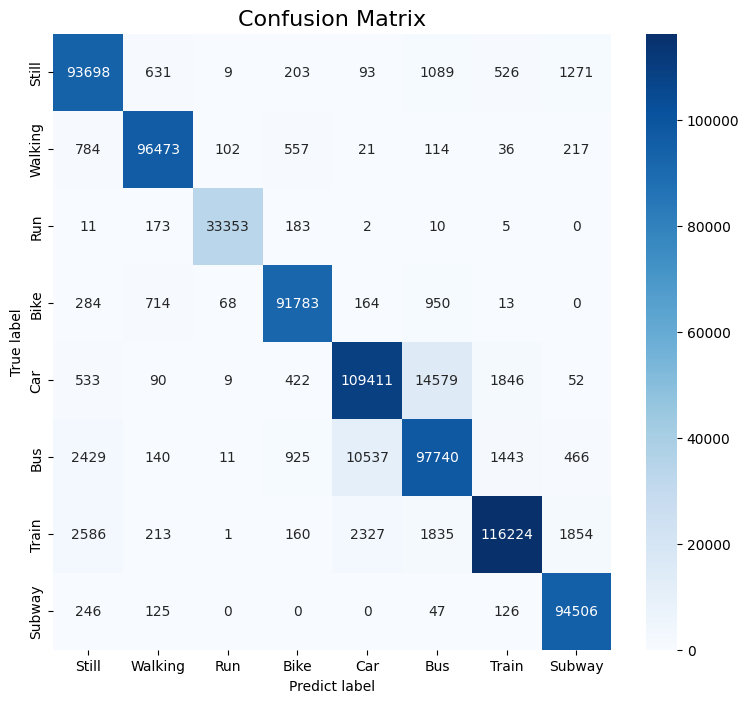

In [99]:
evaluate(y_test, y_test_pred)